
Acurácia: 0.8894166666666666
Matriz de Confusão:
 [[1030    1   17   52    2    0   93    0    7    0]
 [   1 1182    5   26    1    0    2    0    1    1]
 [  14    0  983   13  107    1   85    0    2    0]
 [  35    4    6 1084   30    0   21    0    4    0]
 [   2    0   77   35 1010    0   72    0    5    1]
 [   0    0    0    0    0 1159    0   39    1   12]
 [ 177    0   98   38   86    0  809    0   10    0]
 [   0    0    0    0    0   23    0 1111    0   25]
 [   2    1    7    6    4    2   21    4 1149    1]
 [   0    0    0    0    0   13    0   33    1 1156]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1202
           1       0.99      0.97      0.98      1219
           2       0.82      0.82      0.82      1205
           3       0.86      0.92      0.89      1184
           4       0.81      0.84      0.83      1202
           5       0.97      0.96      0.96      1211
           6       0.73      0.66      

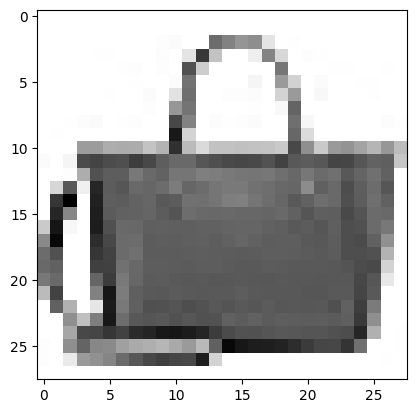

In [1]:
# Passo 1: Importar bibliotecas
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Passo 2: Carregar e preparar o dataset (exemplo com Fashion MNIST)
dataset =  tf.keras.datasets.fashion_mnist.load_data()


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Passo 3: Dividir o dataset em treinamento e teste
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Passo 4: Escolher um algoritmo de machine learning (exemplo com SVM)
from sklearn.svm import SVC
model = SVC()

# Passo 5: Treinar o modelo
model.fit(x_train.reshape(-1, 28 * 28), y_train)

# Passo 6: Avaliar o modelo
y_pred = model.predict(x_val.reshape(-1, 28 * 28))
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Passo 7: Visualizar os resultados
print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print(classification_report(y_val, y_pred))

# Plotar um exemplo de imagem
plt.figure()
plt.imshow(x_val[0], cmap=plt.cm.binary)
plt.show()


## Exemplo 1: Estimação de perdas de potência em linhas de transmissão

Problema: Você deseja estimar as perdas de potência em uma linha de transmissão a partir de dados de medição de tensão e corrente.

Variáveis: As variáveis que você pode controlar são as características da linha de transmissão, como a resistência, a reatância e a comprimento.

Função de custo: A função de custo pode ser definida como a diferença entre as perdas de potência estimadas e as perdas de potência reais.

Implementação: Aqui está uma implementação de um algoritmo de regressão linear para esse problema usando Python e TensorFlow:




7/7 [==============================] - 0s 2ms/step
Erro médio quadrático:  323.54626


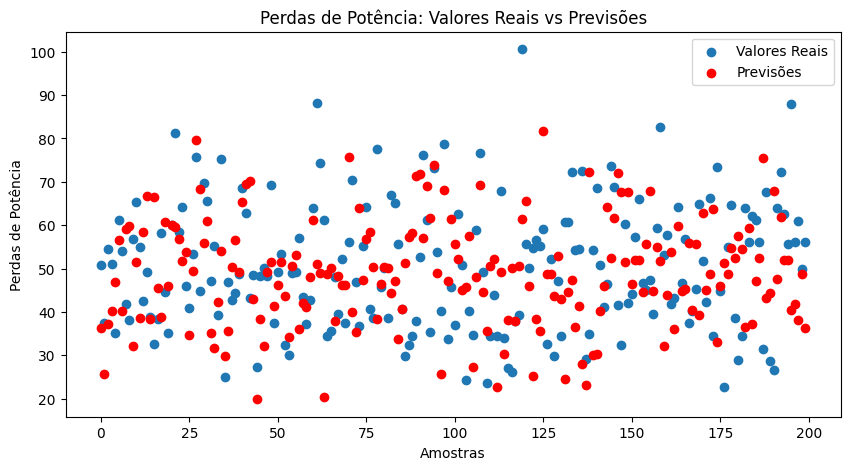

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Simular dados para o exemplo
np.random.seed(0)
n_samples = 1000
tensao = np.random.normal(120, 5, n_samples)  # Tensão em volts
corrente = np.random.normal(10, 1, n_samples)  # Corrente em amperes
resistencia = np.random.normal(0.5, 0.1, n_samples)  # Resistência em ohms
reatancia = np.random.normal(0.3, 0.05, n_samples)  # Reatância em ohms
comprimento = np.random.normal(100, 20, n_samples)  # Comprimento em metros

# Calcular perdas de potência (simplificando, P = I^2 * R)
perdas_reais = corrente ** 2 * resistencia

# Preparar dados para o TensorFlow
features = np.column_stack((tensao, corrente, resistencia, reatancia, comprimento))
targets = perdas_reais.reshape(-1, 1)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Modelo de regressão linear com TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(5,))  # 5 features de entrada
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Fazer previsões e calcular erro
y_pred = model.predict(X_test)
mse = tf.keras.losses.MeanSquaredError()
error = mse(y_test, y_pred).numpy()
print("Erro médio quadrático: ", error)

# Visualizar algumas previsões
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais')
plt.scatter(range(len(y_pred)), y_pred, label='Previsões', color='r')
plt.xlabel('Amostras')
plt.ylabel('Perdas de Potência')
plt.title('Perdas de Potência: Valores Reais vs Previsões')
plt.legend()
plt.show()


## Exemplo 2: Estimação de parâmetros de motores elétricos

Problema: Você deseja estimar os parâmetros de um motor elétrico a partir de dados de medição de tensão, corrente e velocidade.

Variáveis: As variáveis que você pode controlar são os parâmetros do motor elétrico, como a resistência, a reatância e a constante de tempo.

Função de custo: A função de custo pode ser definida como a diferença entre os parâmetros estimados e os parâmetros reais.

Implementação: Aqui está uma implementação de um algoritmo de regressão linear para esse problema usando Python e scikit-learn:

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importe os dados de treinamento
data = pd.read_csv('data/motors.csv')

# Crie o modelo de regressão linear
model = LinearRegression()

# Treine o modelo
model.fit(data.drop('params', axis=1), data['params'])

# Faça previsões
predictions = model.predict(data.drop('params', axis=1))

# Calcule o erro
error = np.mean((predictions - data['params'])**2)

# Imprima os resultados
print(error)

plt.plot(data['params'], predictions, label='Parâmetros estimados')
plt.plot(data['params'], data['params'], label='Parâmetros reais')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/motors.csv'